In [8]:
import numpy as np
import numpy.random as nrd

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, FactorAnalysis

# Exercise 14.15

Generate 200 observations of three variates X1, X2, X3 according to

- X1 ∼ Z1
- X2 = X1 + 0.001 · Z2
- X3 = 10 · Z3

where Z1, Z2, Z3 are independent standard normal variates. Compute the
leading principal component and factor analysis directions. Hence show
that the leading principal component aligns itself in the maximal variance
direction X3, while the leading factor essentially ignores the uncorrelated
component X3, and picks up the correlated component X2 + X1 (Geoffrey
Hinton, personal communication).

# Solution

Data generation,

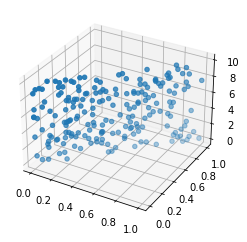

In [11]:
N = 200

X1 = nrd.rand(N,1)
X2 = X1 + 1e-3 * nrd.rand(N,1)
X3 = 10 * nrd.rand(N,1)

X = np.hstack((X1,X2,X3))

# Visualize the data,
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X1, X2, X3)
plt.show()

### Principal component Analysis

Let's see what the first component of the PCA is (should be X3 - max variance),

In [25]:
model1 = PCA(n_components=1)
model1.fit(X)

# Main component via PDA
model1.components_

array([[ 0.00417508,  0.00416852, -0.9999826 ]])

### Factor Analysis

Let's see what the first component of the Factor Analysis is (should be X1+X2 - max correlations). To get the correlations, however, we need to standardize the feature vectors,

In [21]:
# Diagonal matrix of standard deviation for the features
D = np.diag(1/np.std(X,axis=0))

The factor analysis technique gives us,

In [26]:
model2 = FactorAnalysis(n_components=1)
model2.fit(X @ D)

# Main component via Factor Analysis
model2.components_

array([[ 0.99999972,  0.99999972, -0.04328676]])